In [15]:
import yfinance as yf
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.collections
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook
import matplotlib.ticker as ticker 


In [16]:

# Defined a list of ticker symbols for the currency pairs here
ticker_symbols = ['CADUSD=X', 'CADEUR=X', 'CADGBP=X','CADAUD=X','CADNZD=X','CADCHF=X','CADHKD=X','CADCNY=X','CADSAR=X']

# I created an empty list to store the DataFrames
dfs = []

for symbol in ticker_symbols:
    #Created ticker object 
    ticker = yf.Ticker(symbol)
    
    #Realtime data extraction
    data = ticker.history(period='1d')
    
    #Dataframe for the real time data
    df = pd.DataFrame(data)
    
    #All need to be relative to CAD, hence setting up Dataframe for the currency pair
    df['Currency Pair'] = symbol
    
    #Merging with list
    dfs.append(df)

#Merging all DataFrames
result_df = pd.concat(dfs)

print(result_df)

                Open      High       Low     Close  Volume  Dividends  \
Date                                                                    
2024-04-26  0.732172  0.733321  0.730241  0.732172       0          0   
2024-04-26  0.682473  0.684380  0.681800  0.682420       0          0   
2024-04-26  0.585270  0.586620  0.584560  0.585260       0          0   
2024-04-26  1.122420  1.122960  1.117600  1.122300       0          0   
2024-04-26  1.228780  1.231560  1.227050  1.228700       0          0   
2024-04-26  0.668060  0.669160  0.666700  0.668060       0          0   
2024-04-26  5.730110  5.740450  5.715234  5.730689       0          0   
2024-04-26  5.184803  5.191264  5.155490  5.184515       0          0   
2024-04-26  2.742457  2.746507  2.735640  2.742989       0          0   

            Stock Splits Currency Pair  
Date                                    
2024-04-26             0      CADUSD=X  
2024-04-26             0      CADEUR=X  
2024-04-26             0      CA

In [17]:

exchange_rates = {
    'CAD to USD': 0.732998,
    'CAD to EUR': 0.683000,
    'CAD to GBP': 0.585500,
    'CAD to AUD': 1.119900,
    'CAD to NZD': 1.227400,
    'CAD to CHF': 0.668830,
    'CAD to HKD': 5.738420,
    'CAD to CNY': 5.310600,
    'CAD to SAR': 2.742600
    
}
df = pd.DataFrame(list(exchange_rates.items()), columns=['Currency Pair', 'Exchange Rate'])


print(df)

  Currency Pair  Exchange Rate
0    CAD to USD       0.732998
1    CAD to EUR       0.683000
2    CAD to GBP       0.585500
3    CAD to AUD       1.119900
4    CAD to NZD       1.227400
5    CAD to CHF       0.668830
6    CAD to HKD       5.738420
7    CAD to CNY       5.310600
8    CAD to SAR       2.742600


<IPython.core.display.Javascript object>


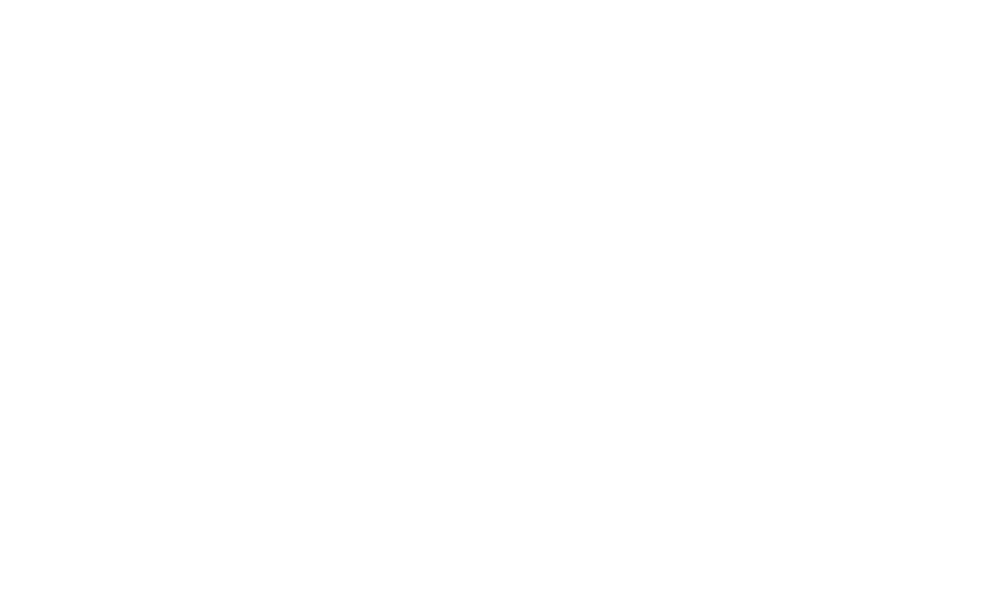

<IPython.core.display.Javascript object>


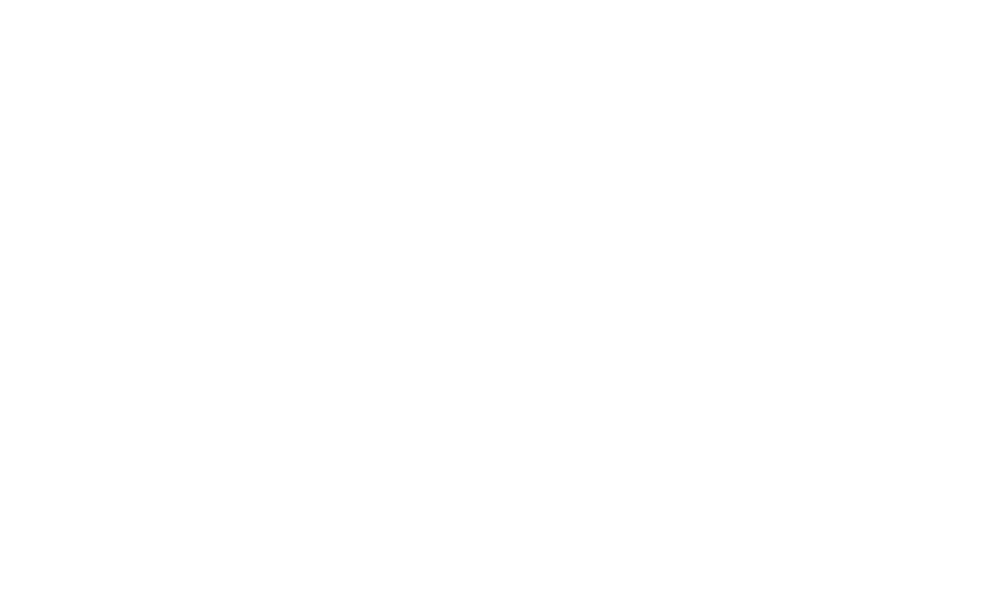

<IPython.core.display.Javascript object>


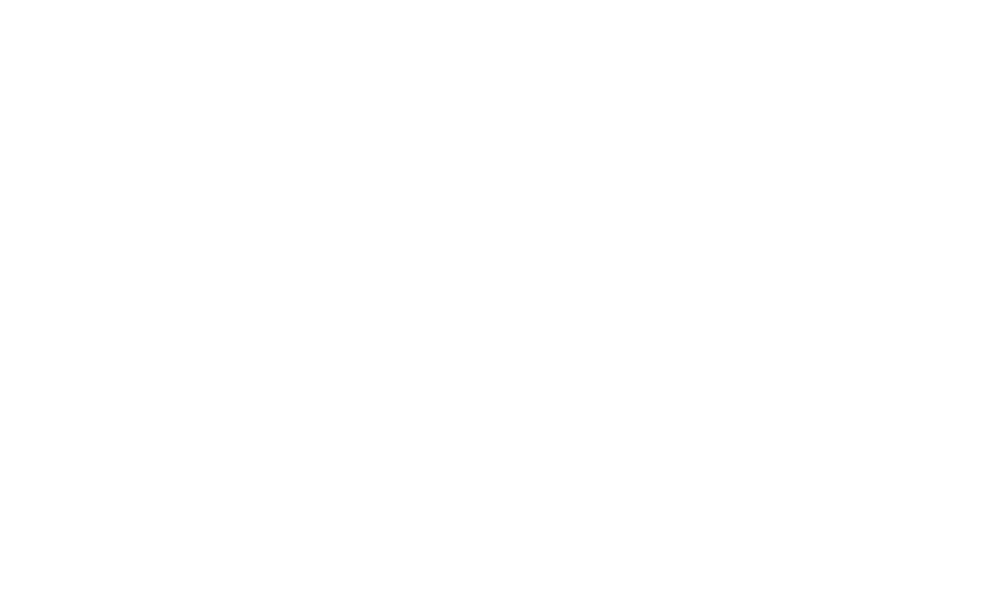

<IPython.core.display.Javascript object>


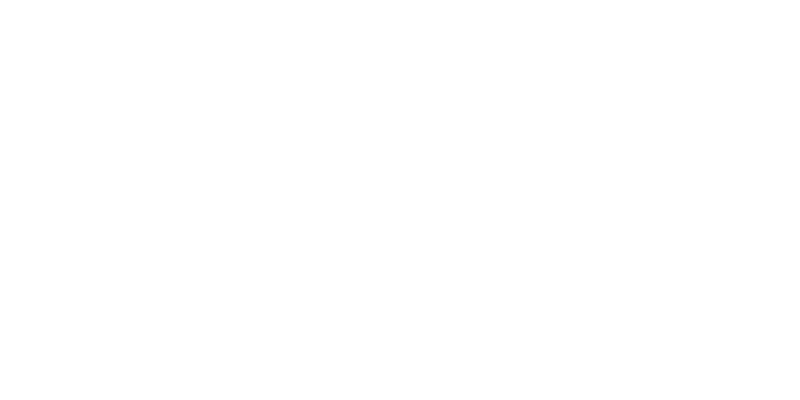

<IPython.core.display.Javascript object>


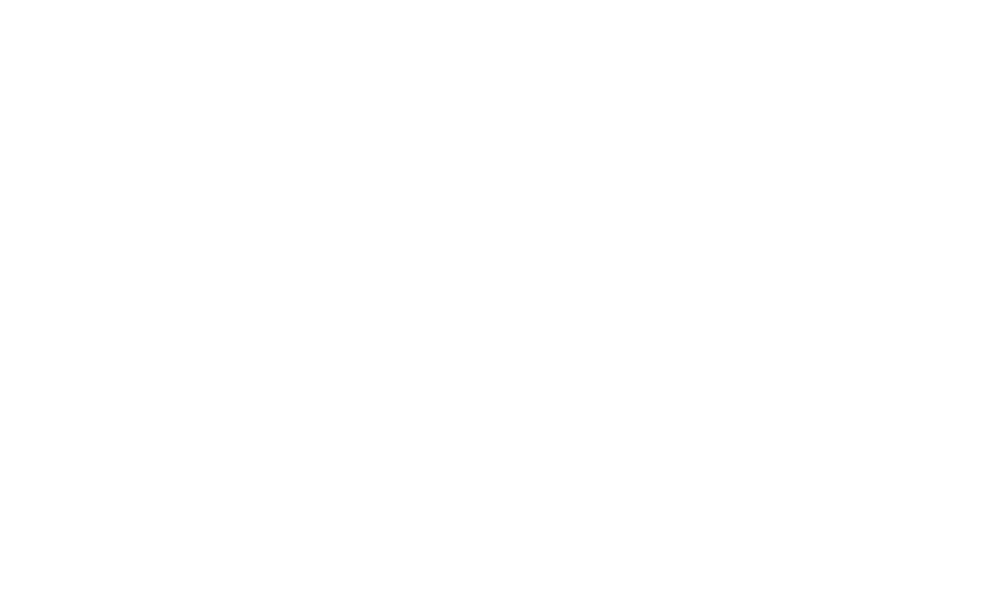

<IPython.core.display.Javascript object>


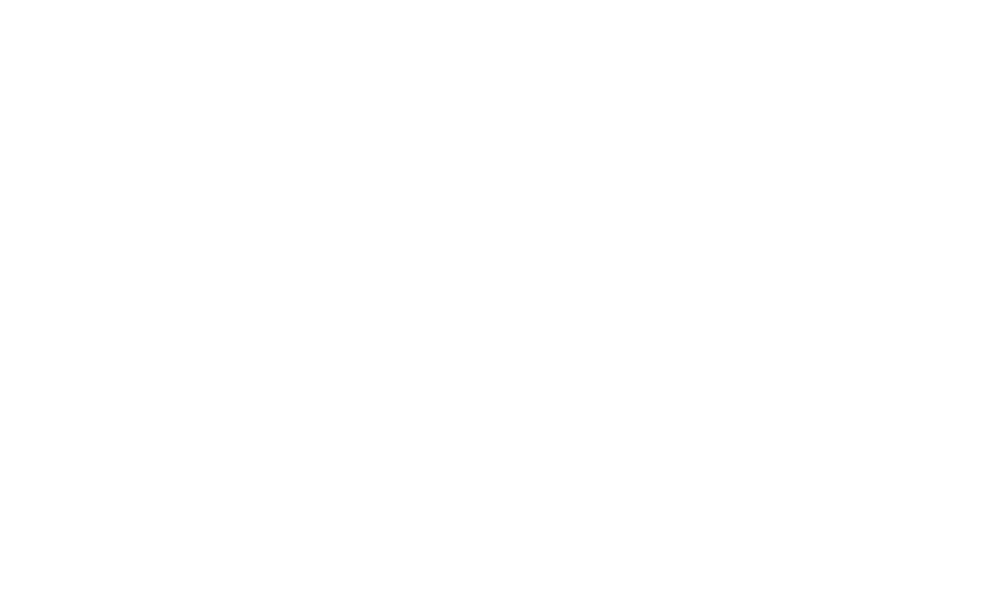

<IPython.core.display.Javascript object>


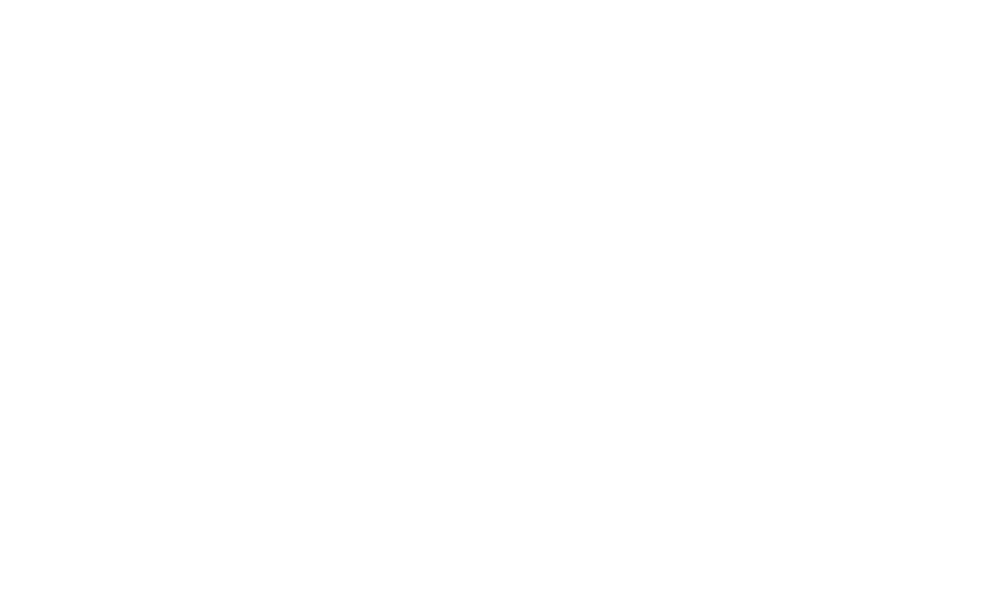

<IPython.core.display.Javascript object>


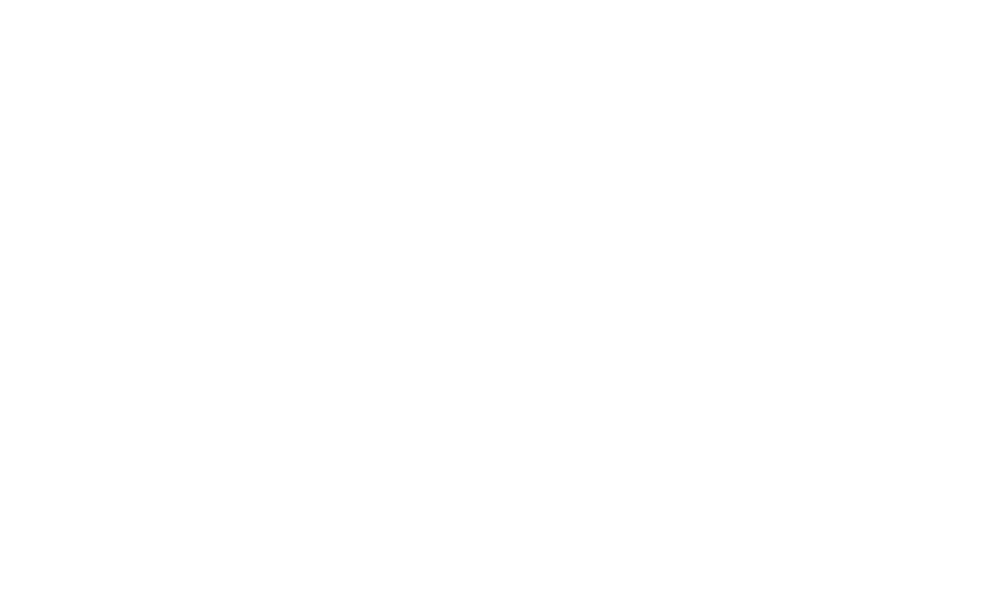

<IPython.core.display.Javascript object>


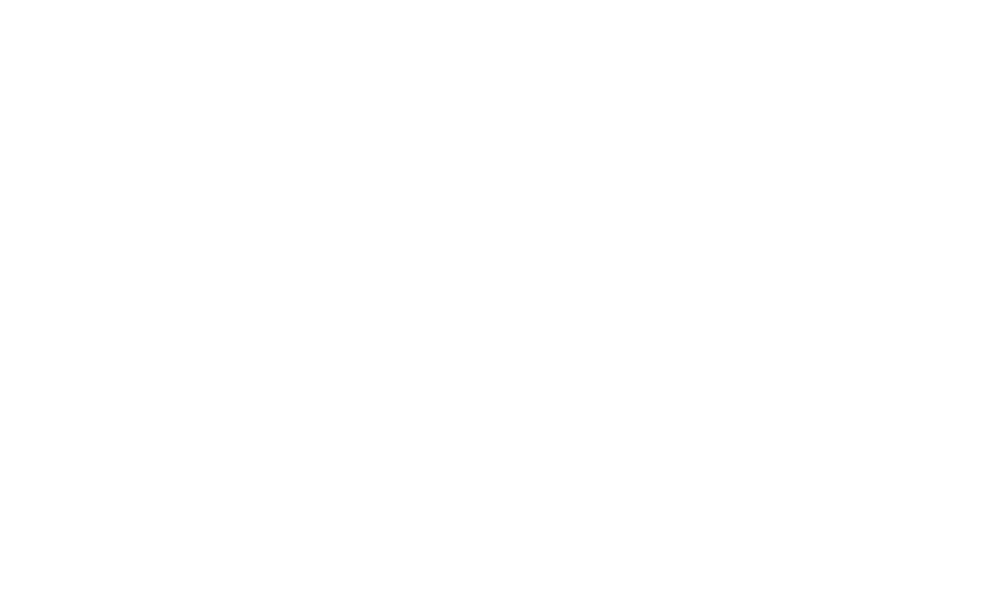

<IPython.core.display.Javascript object>


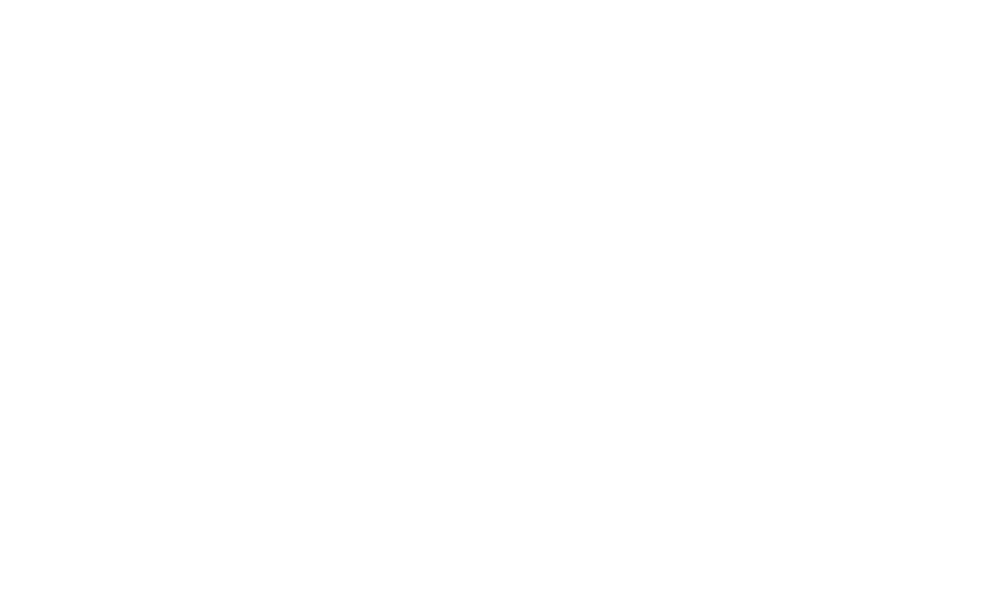

<IPython.core.display.Javascript object>


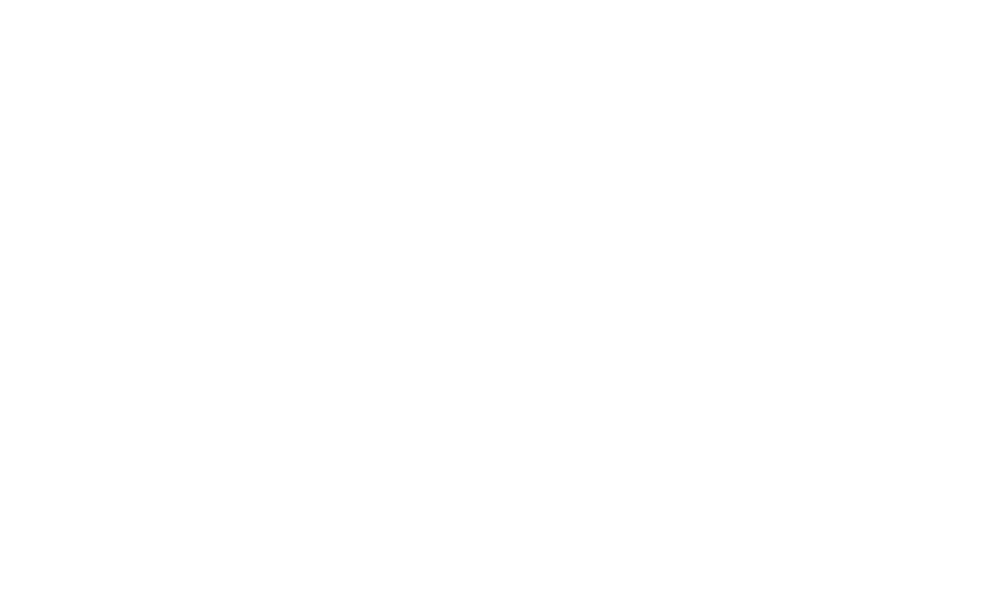

<IPython.core.display.Javascript object>


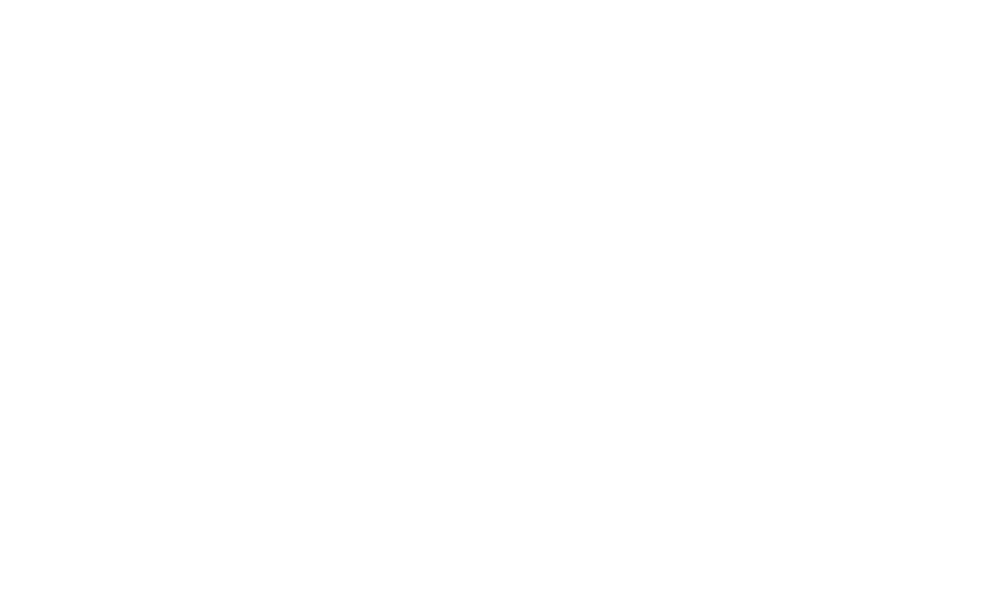

<IPython.core.display.Javascript object>


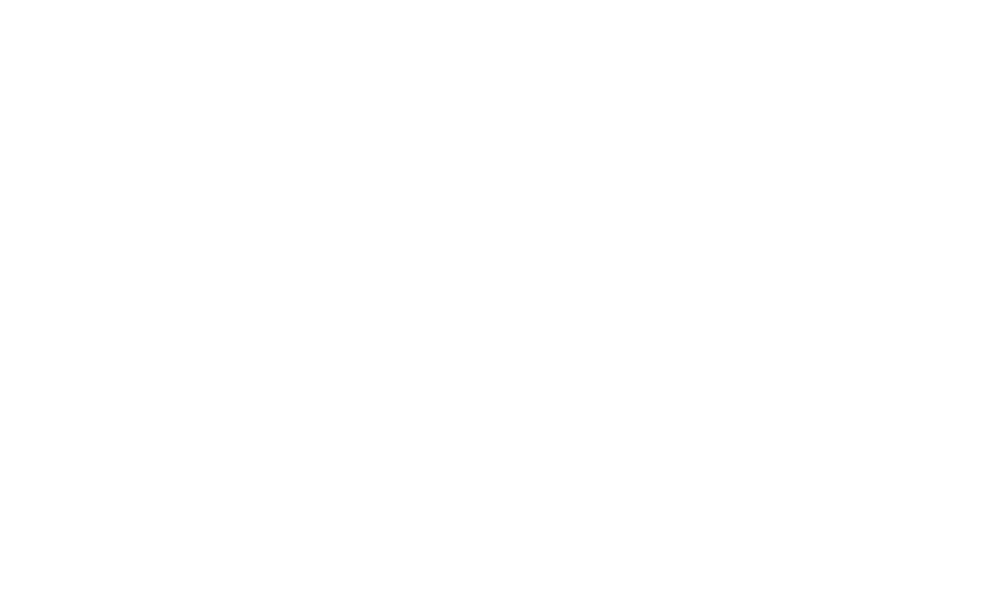

<IPython.core.display.Javascript object>


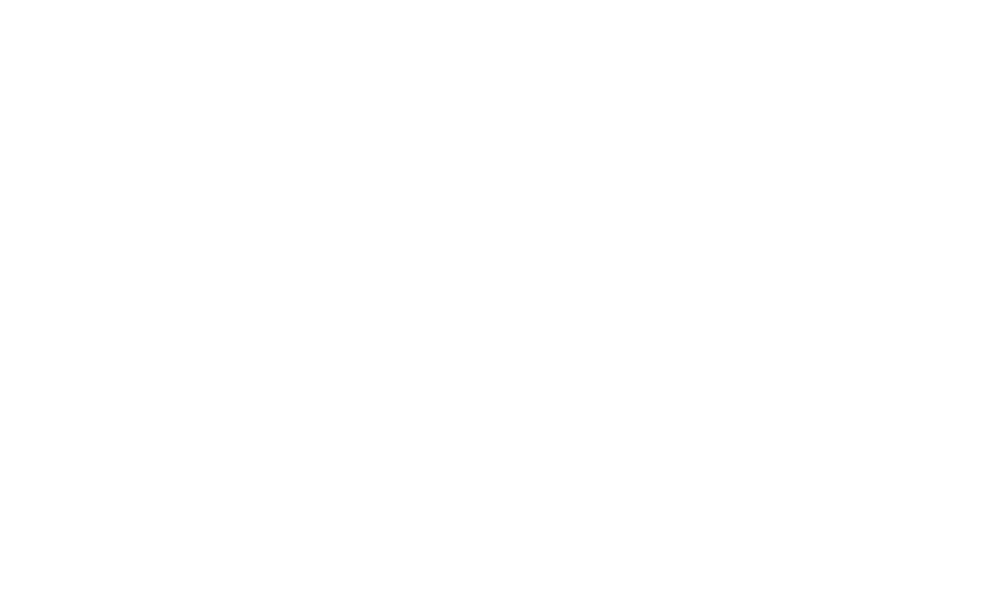

<IPython.core.display.Javascript object>


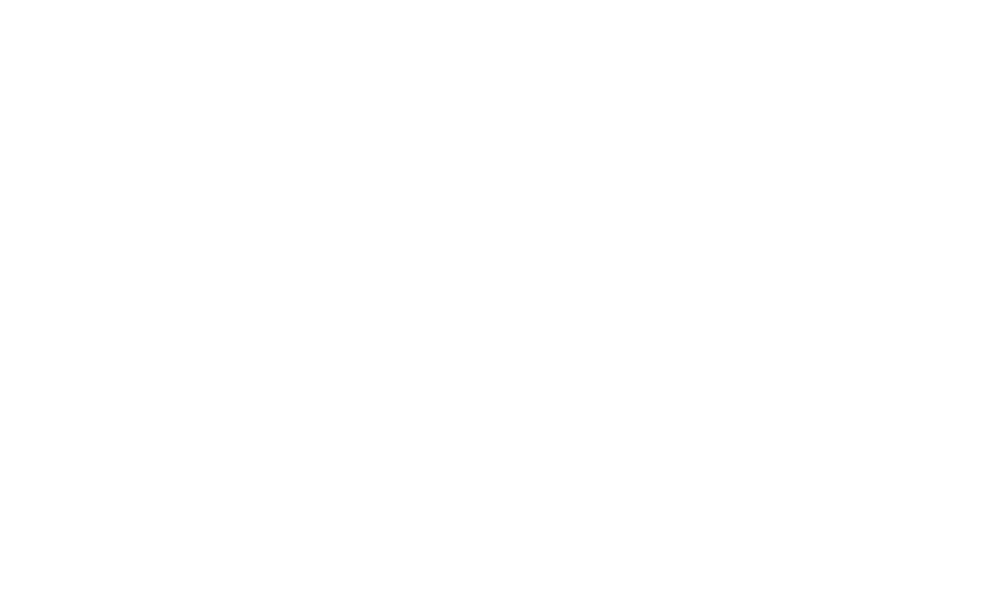

<IPython.core.display.Javascript object>


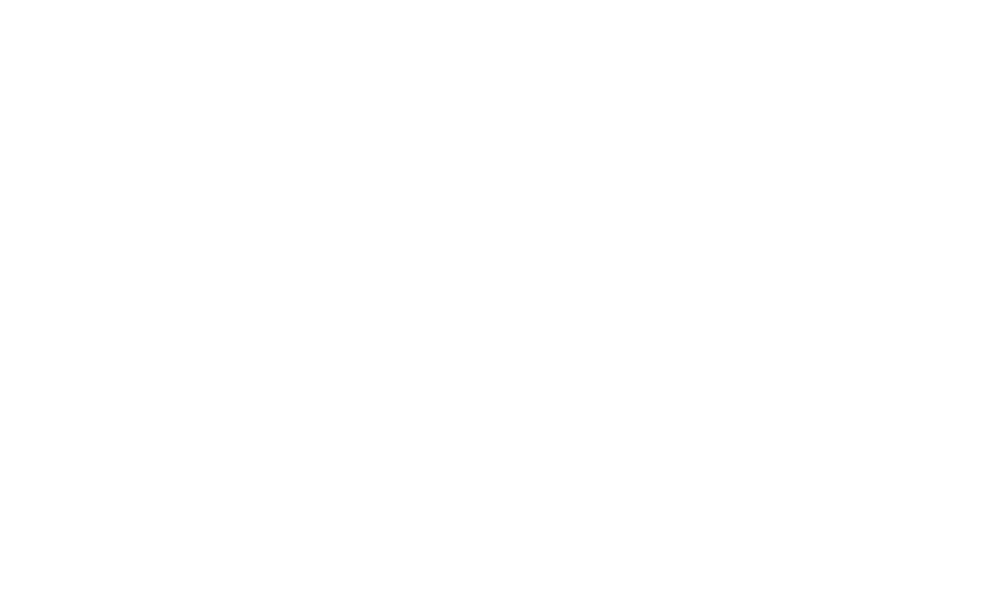

<IPython.core.display.Javascript object>


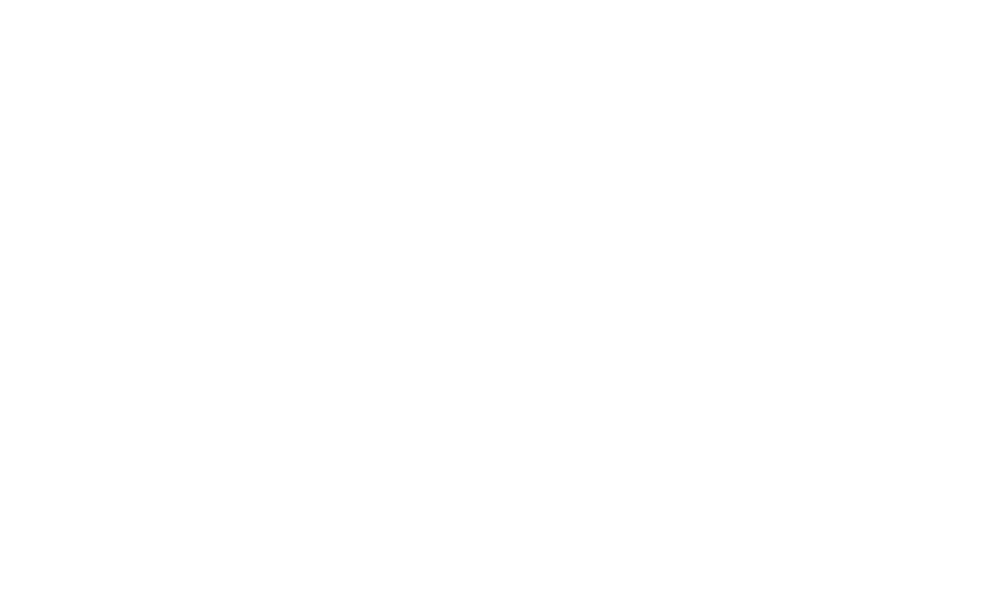

<IPython.core.display.Javascript object>


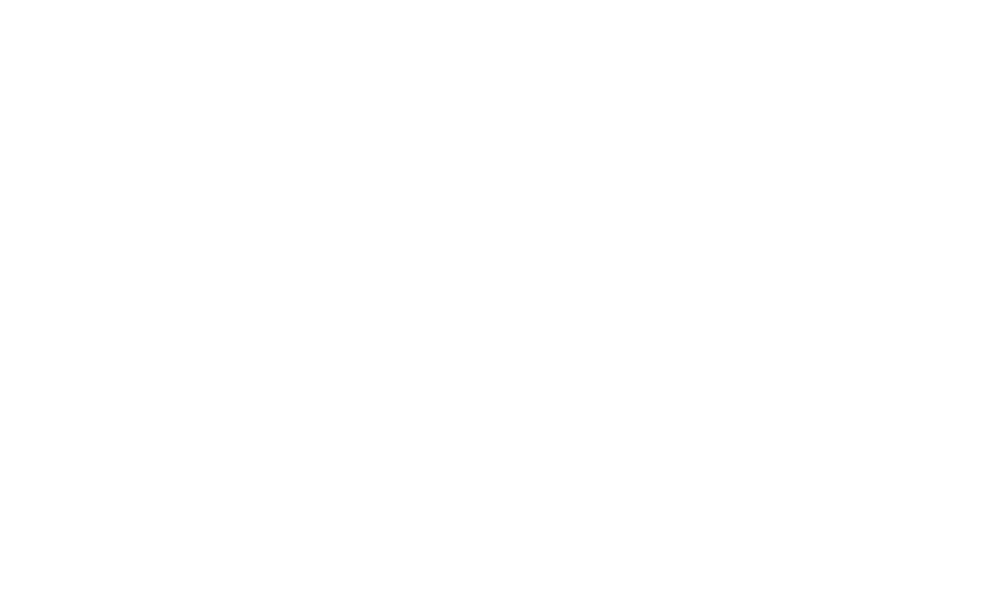

<IPython.core.display.Javascript object>


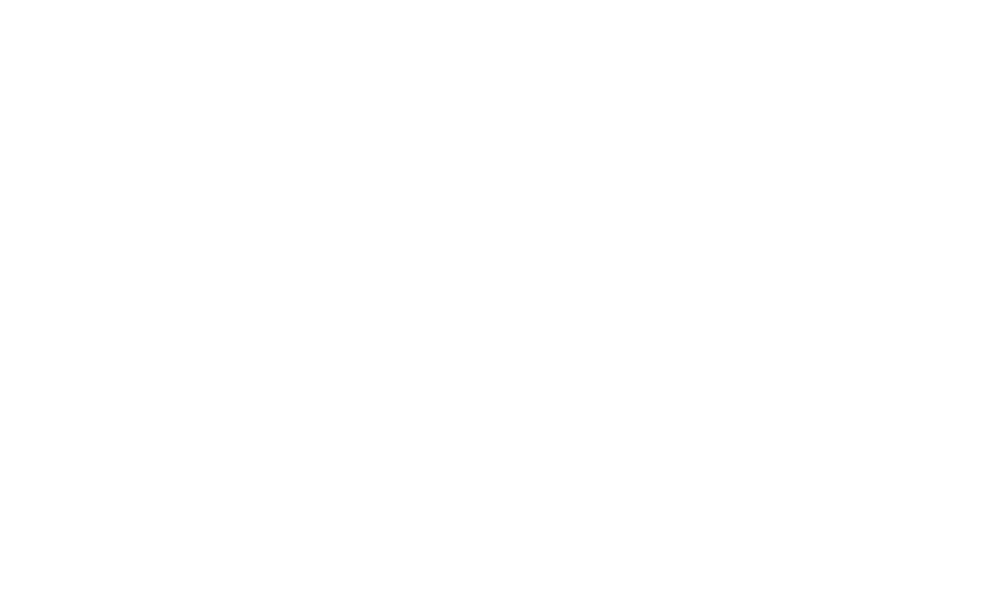

<IPython.core.display.Javascript object>


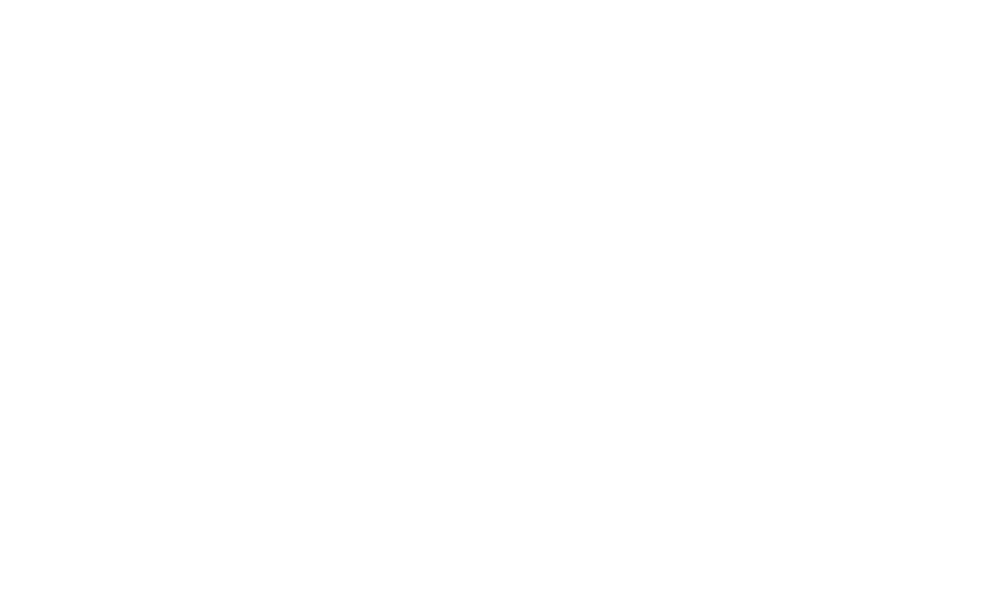

<IPython.core.display.Javascript object>


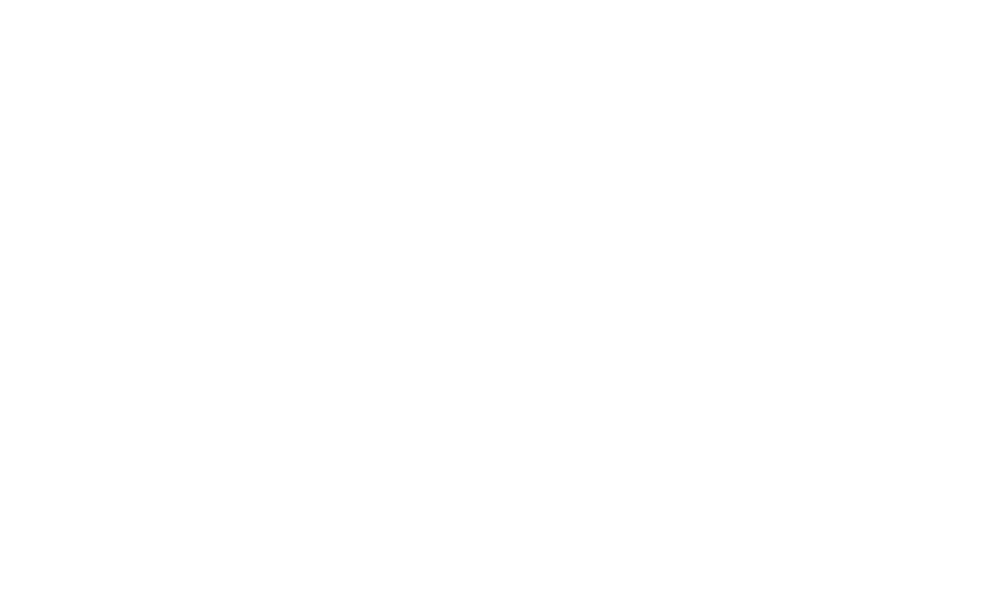

<IPython.core.display.Javascript object>


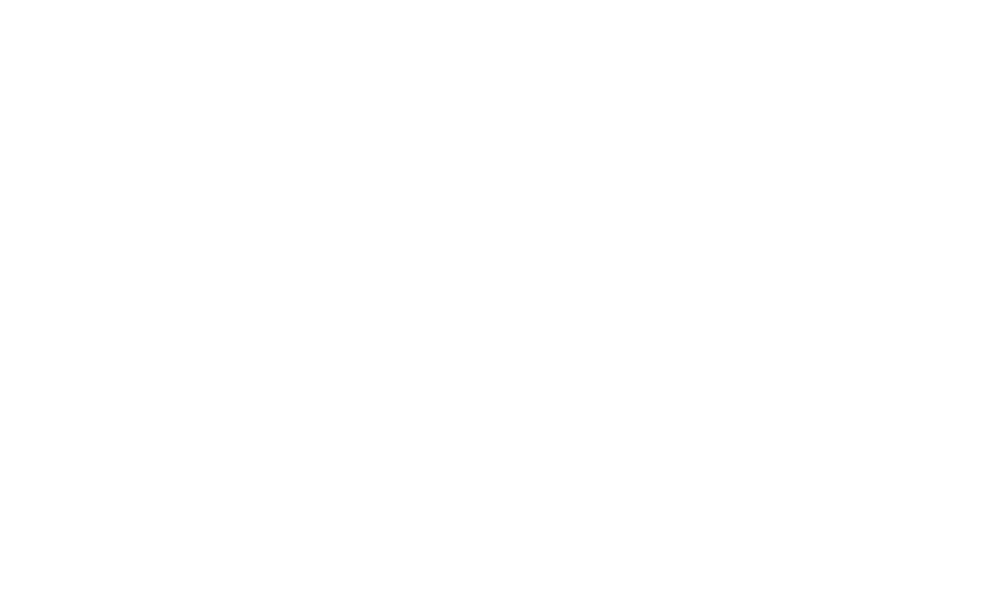

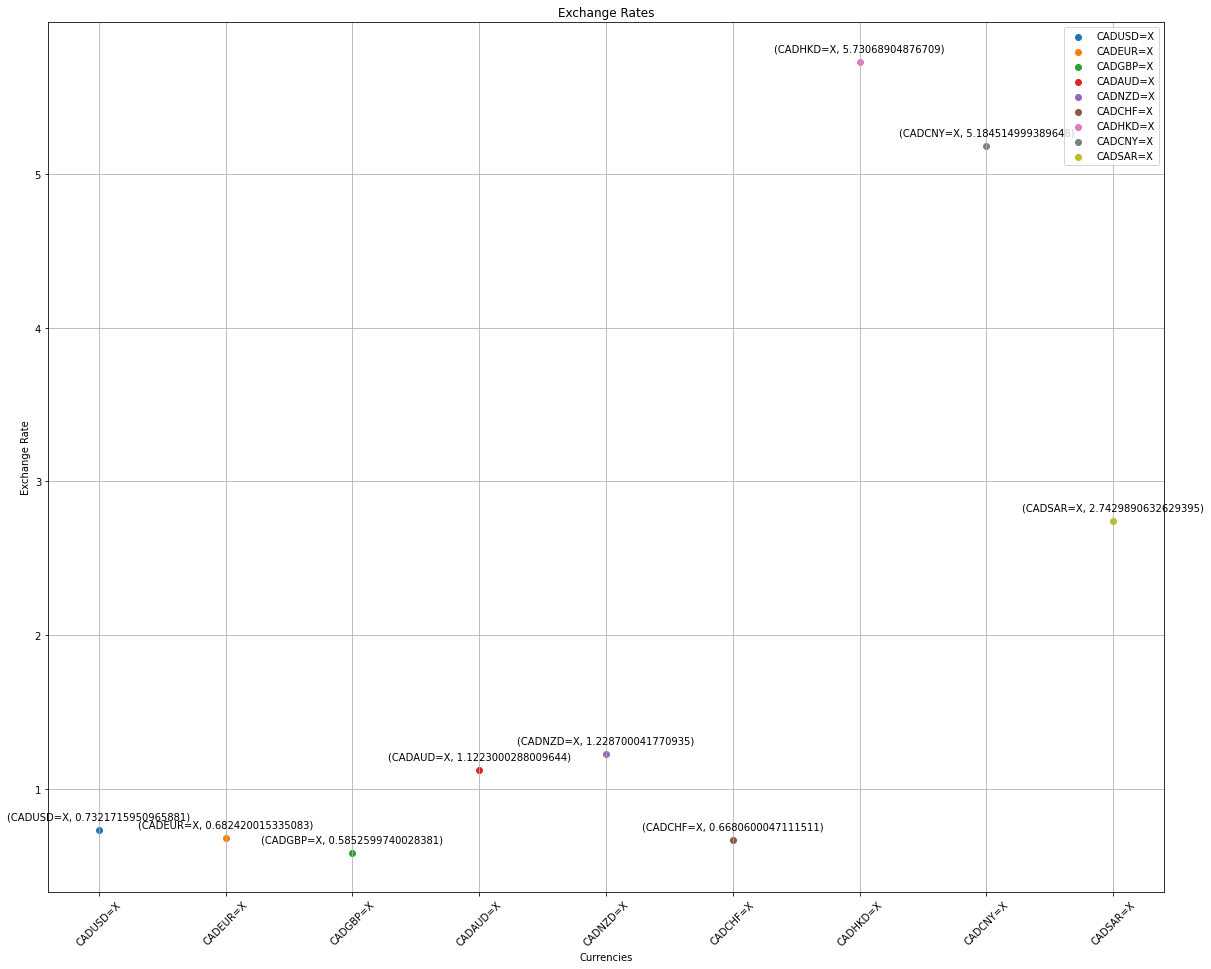

AttributeError: 'NoneType' object has no attribute 'remove_callback'

<IPython.core.display.Javascript object>


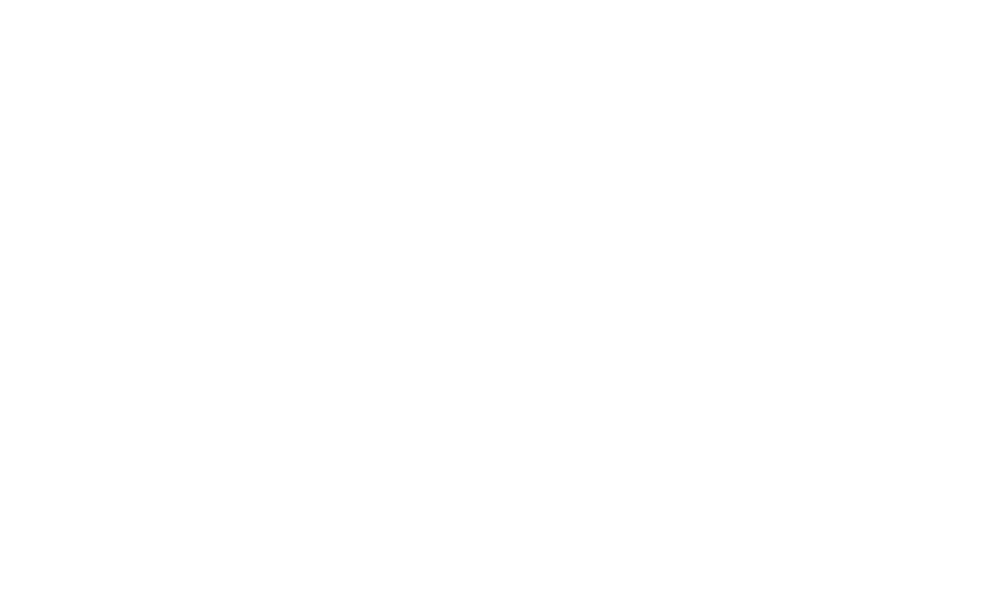

<IPython.core.display.Javascript object>


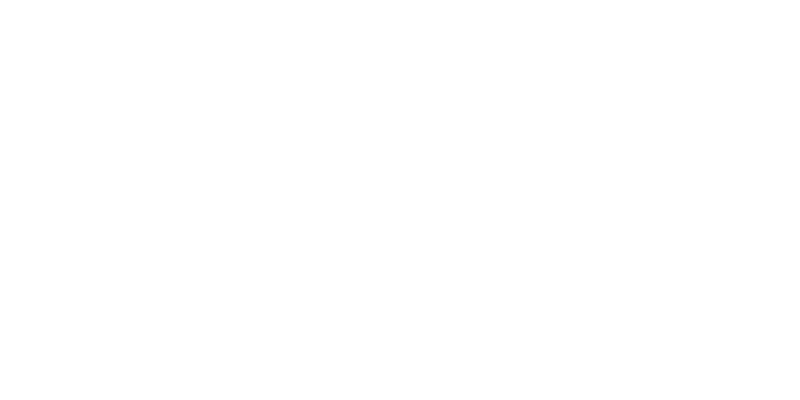

<IPython.core.display.Javascript object>


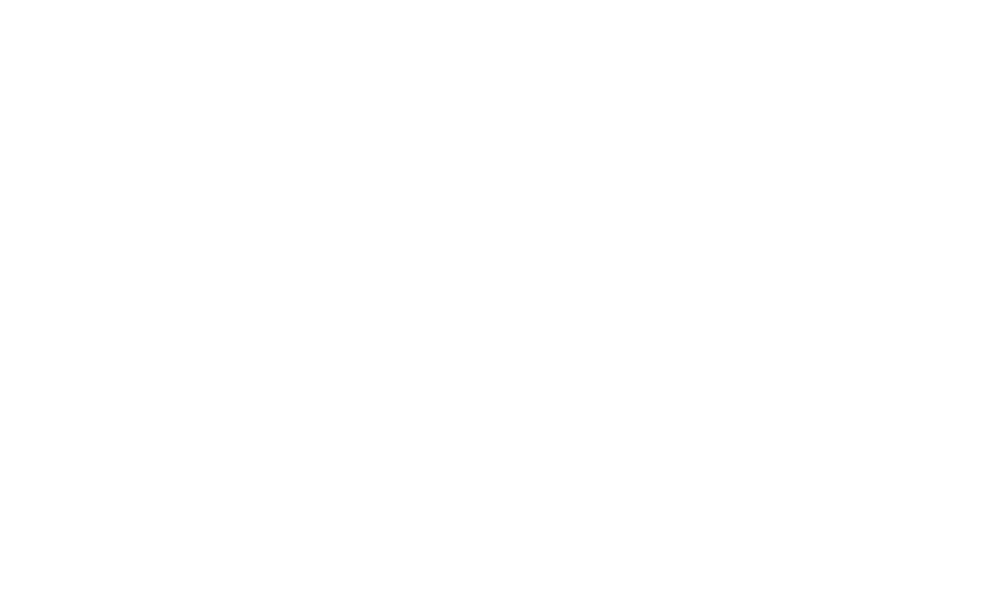

<IPython.core.display.Javascript object>


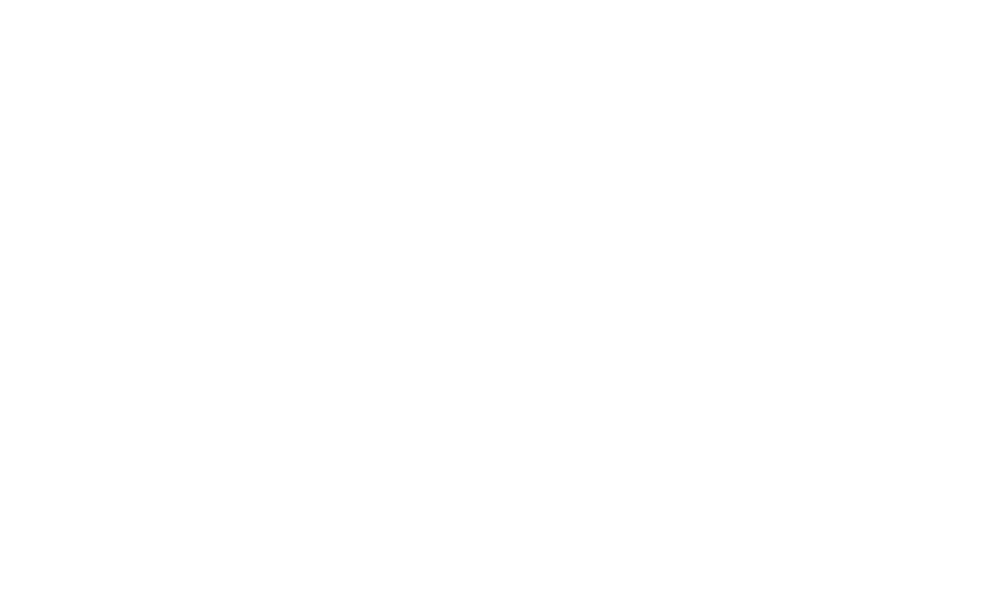

<IPython.core.display.Javascript object>


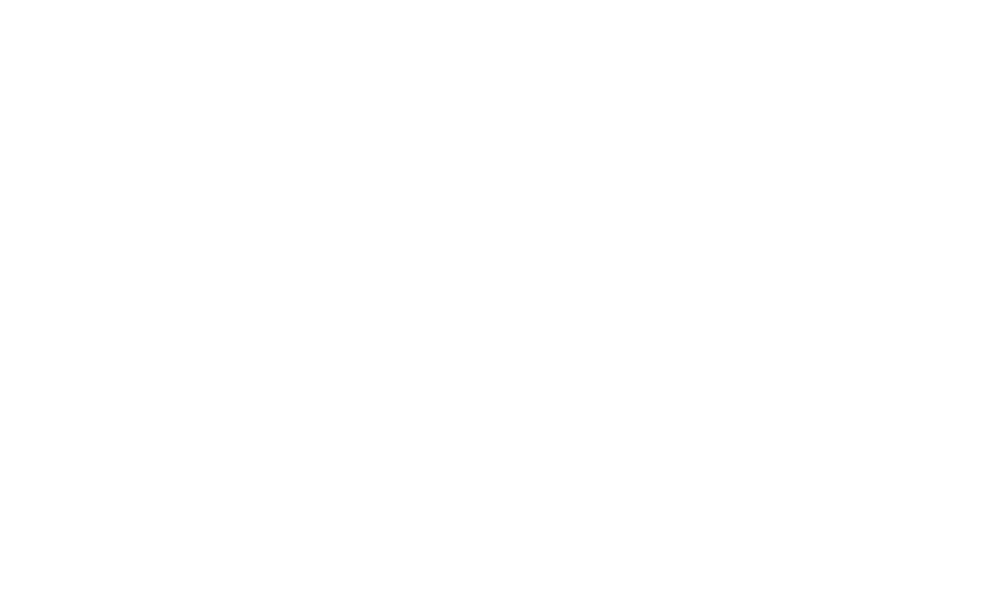

<IPython.core.display.Javascript object>


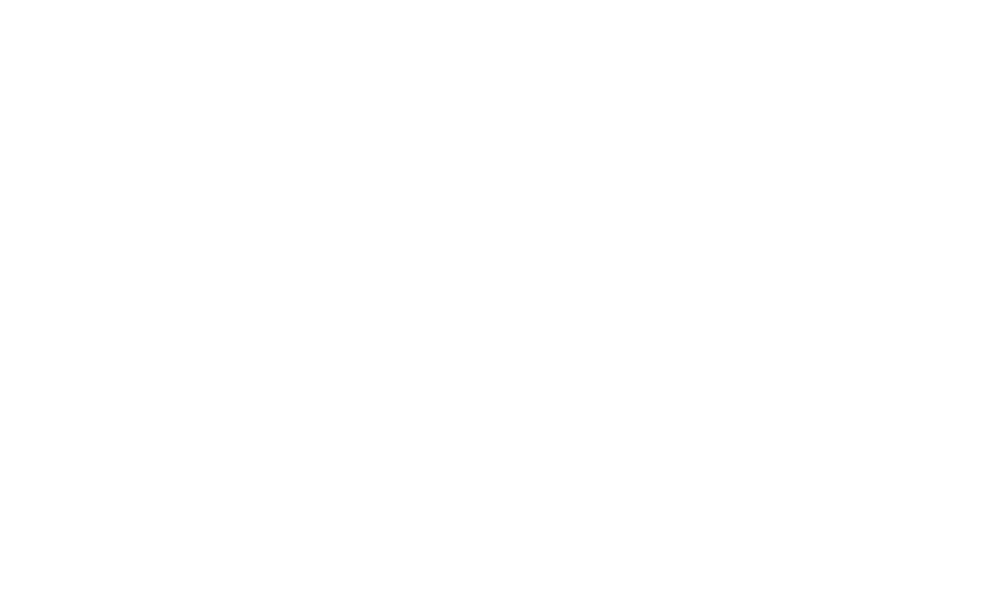

<IPython.core.display.Javascript object>


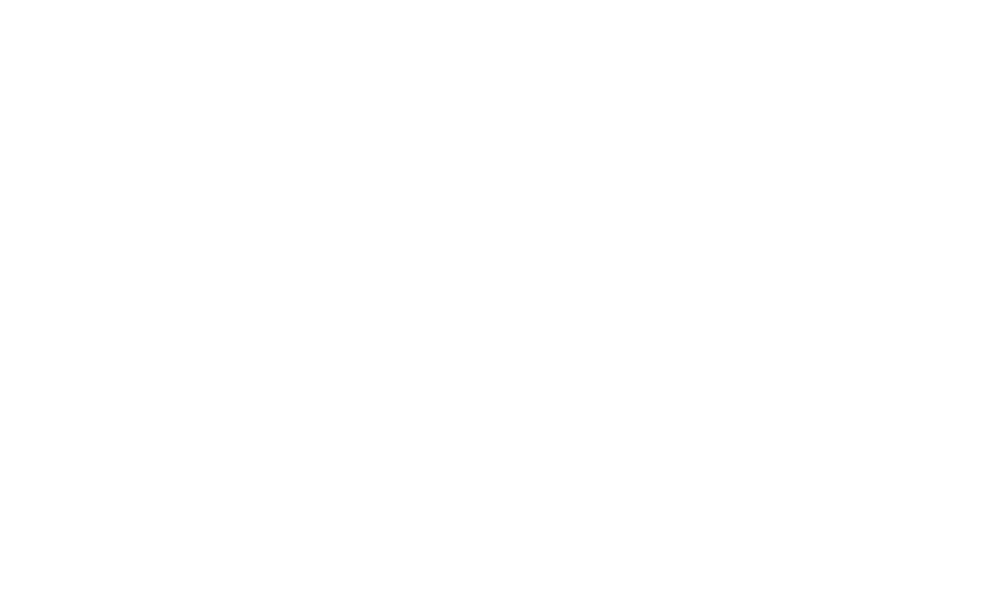

<IPython.core.display.Javascript object>


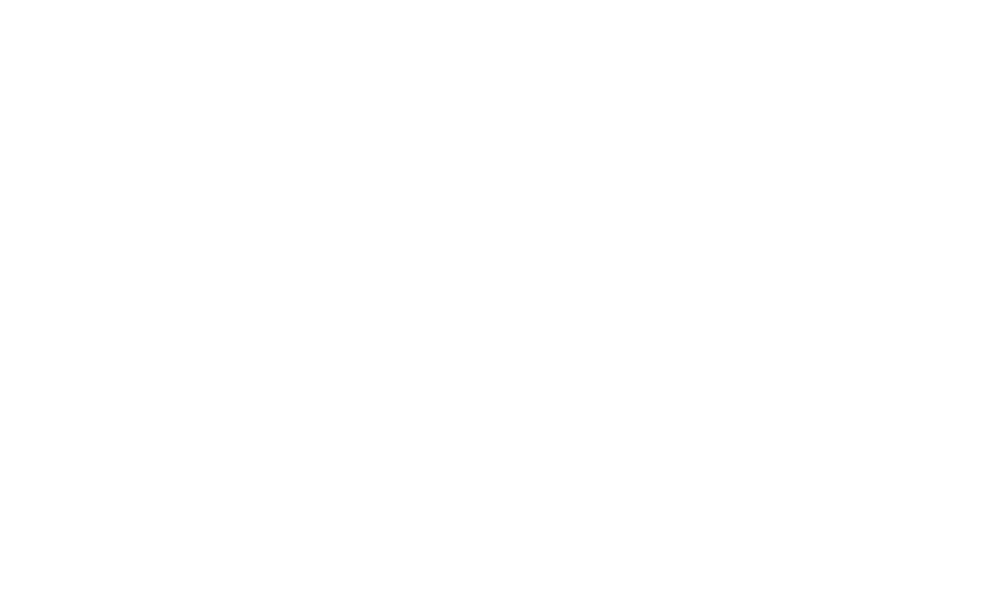

<IPython.core.display.Javascript object>


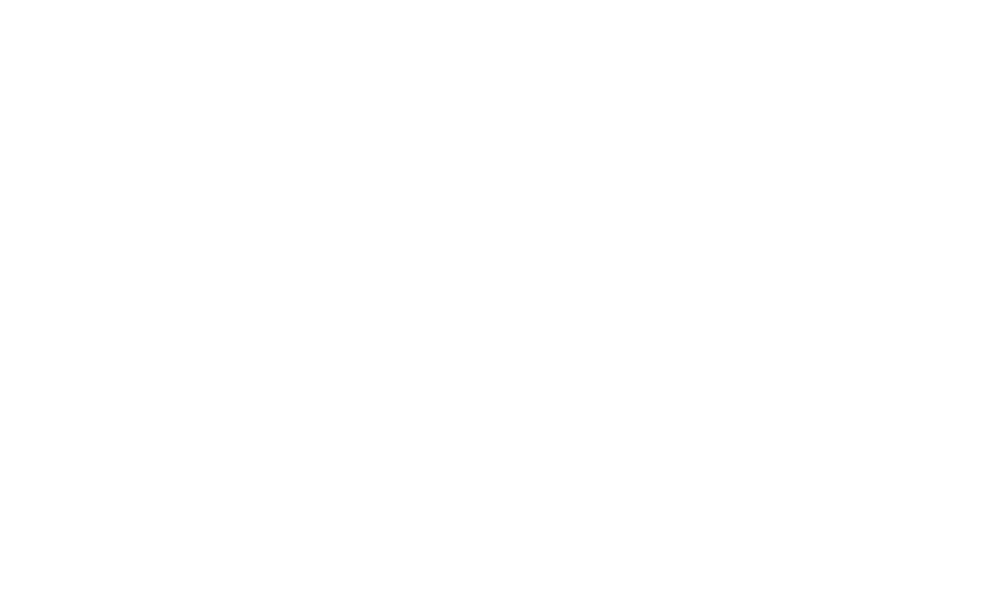

<IPython.core.display.Javascript object>


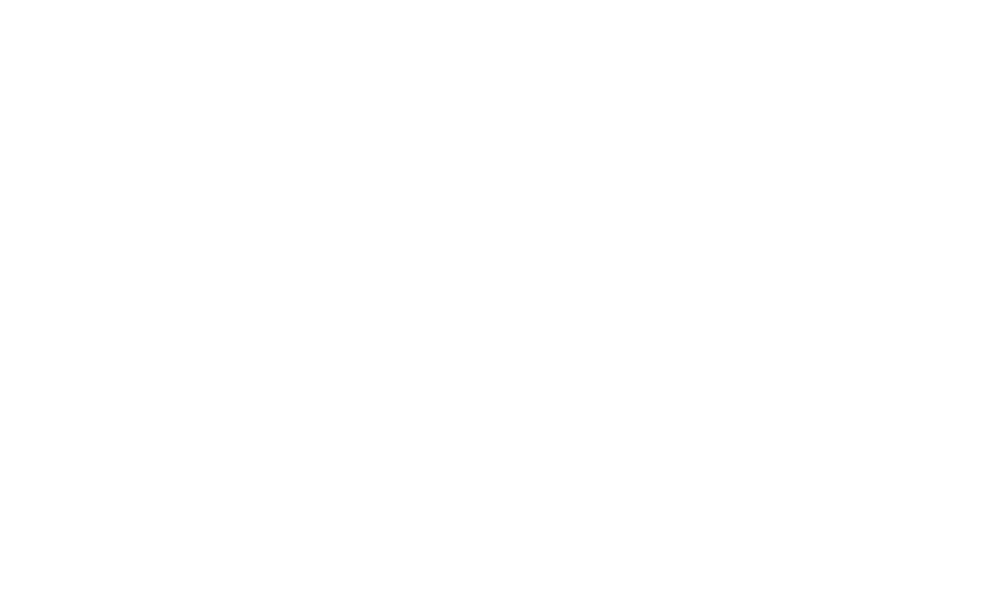

<IPython.core.display.Javascript object>


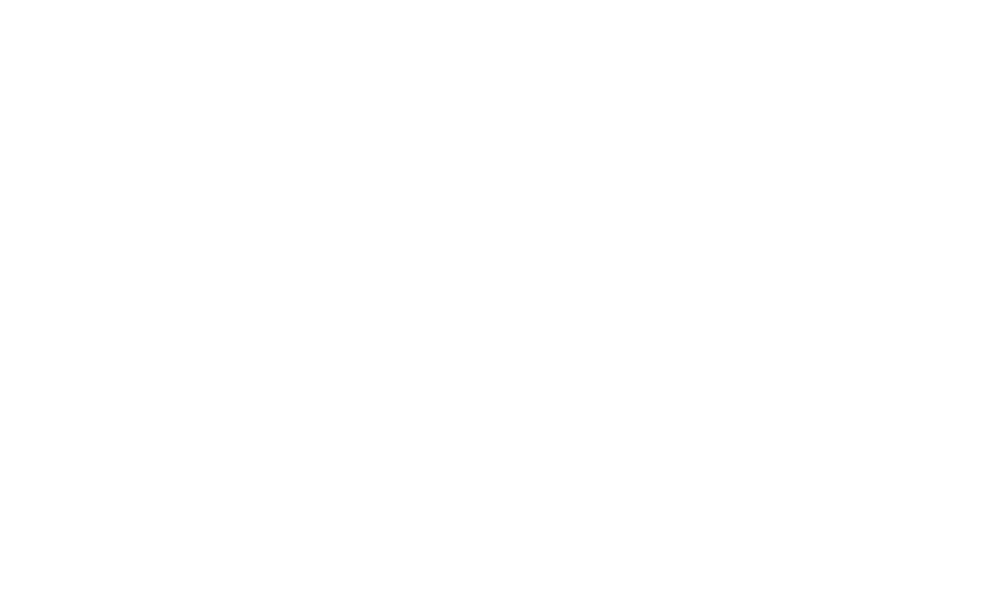

<IPython.core.display.Javascript object>


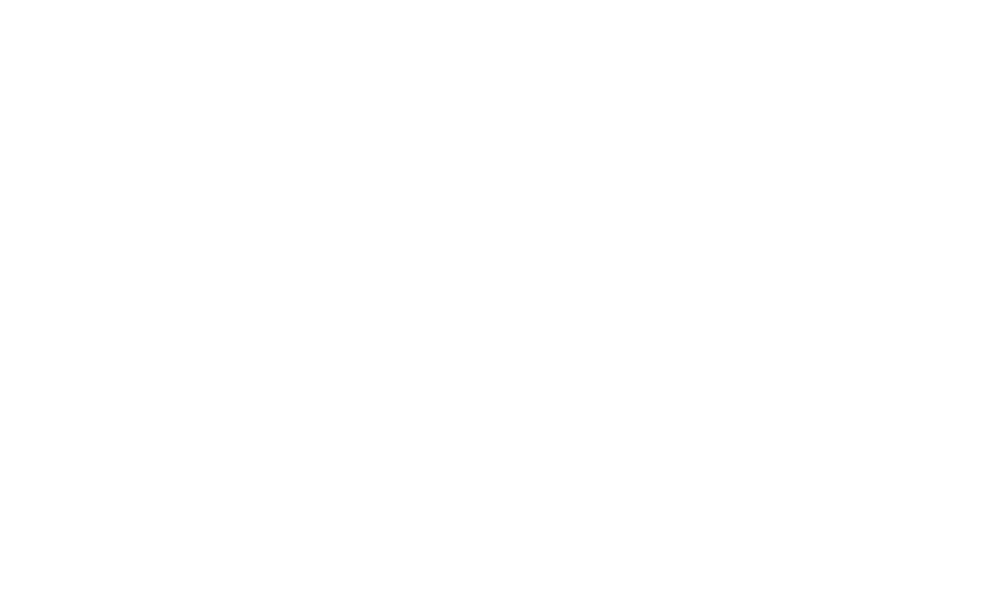

<IPython.core.display.Javascript object>


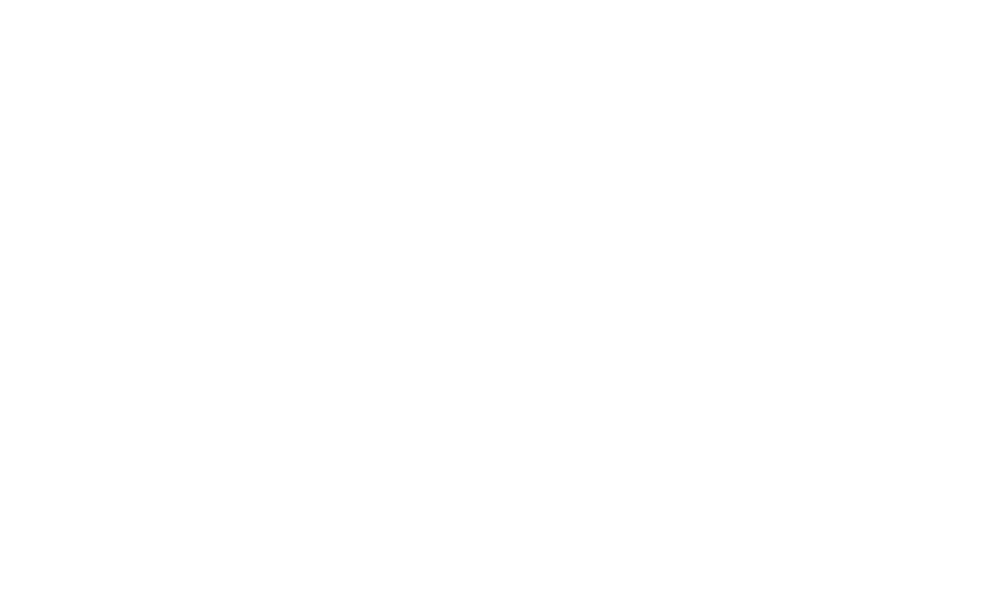

<IPython.core.display.Javascript object>


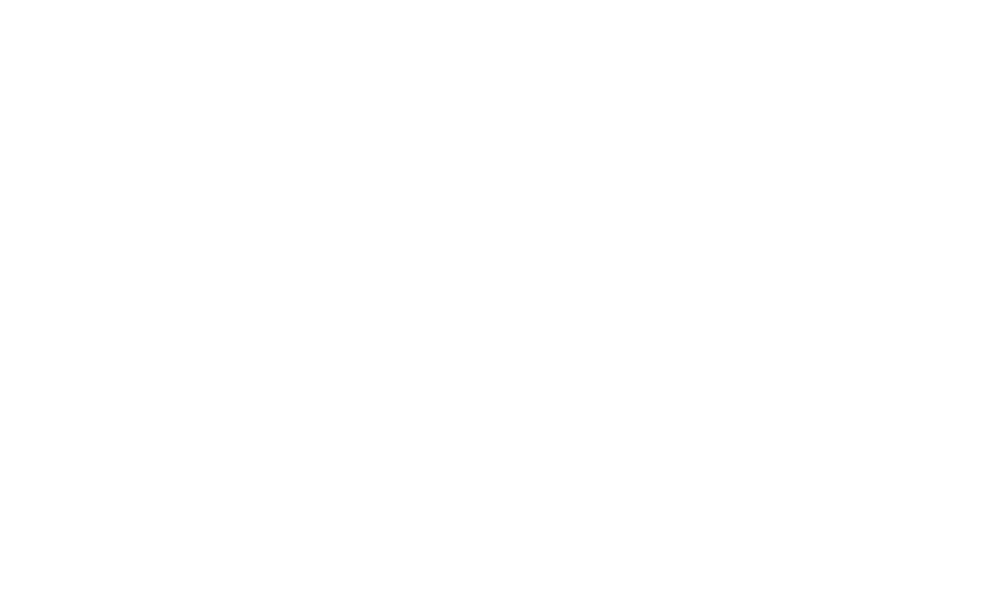

<IPython.core.display.Javascript object>


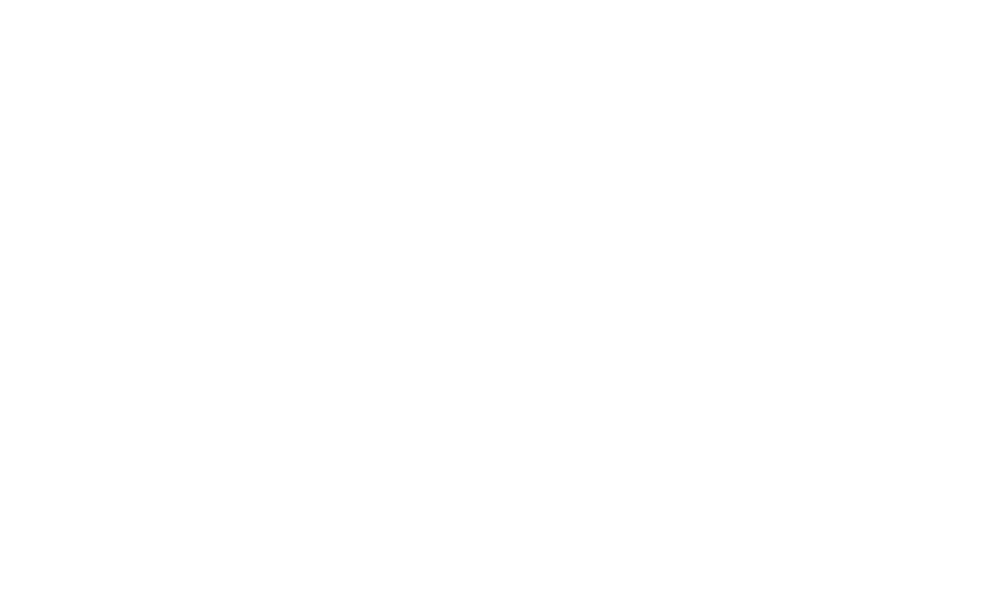

<IPython.core.display.Javascript object>


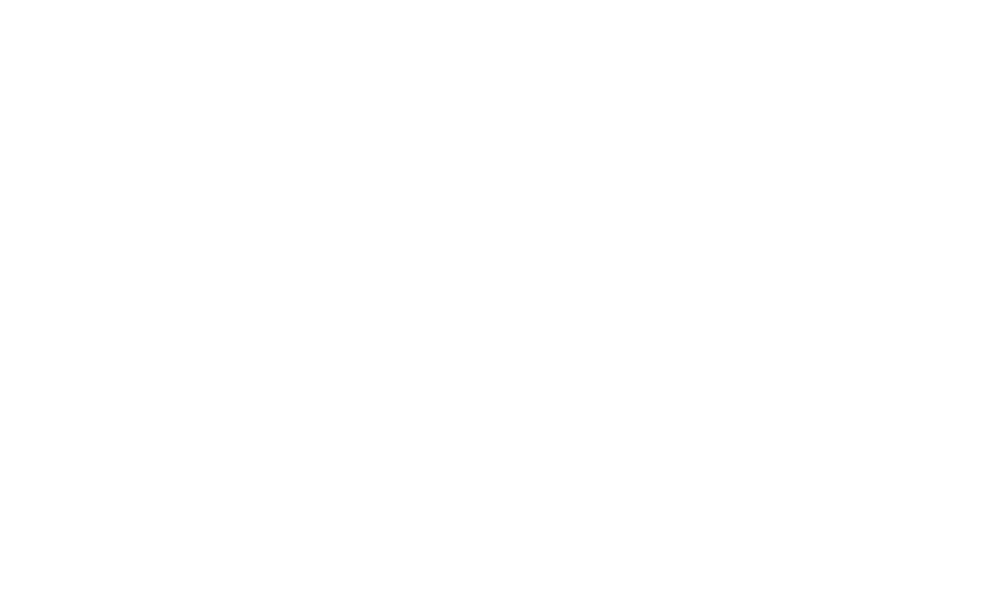

<IPython.core.display.Javascript object>


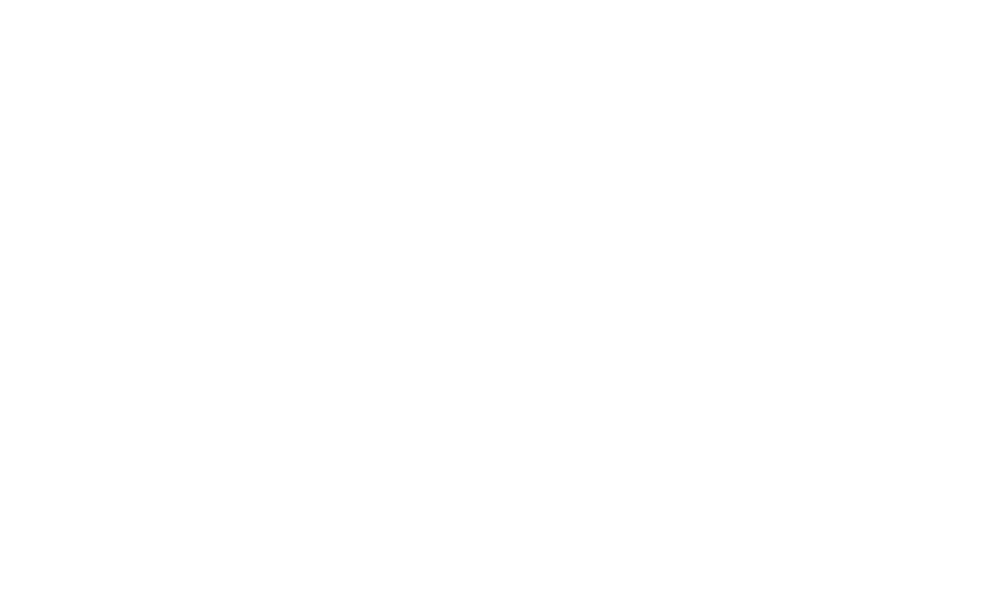

<IPython.core.display.Javascript object>


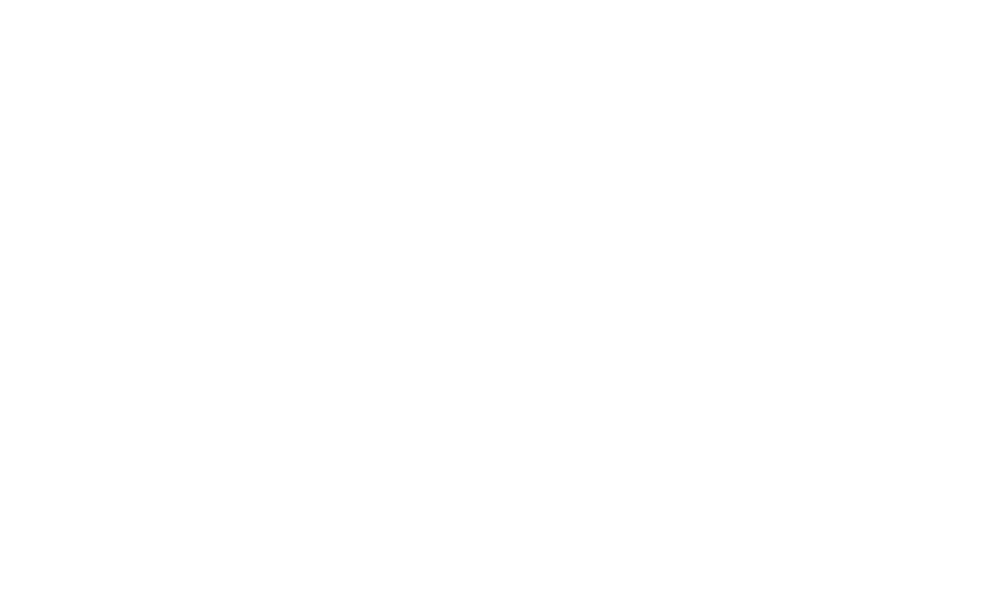

<IPython.core.display.Javascript object>


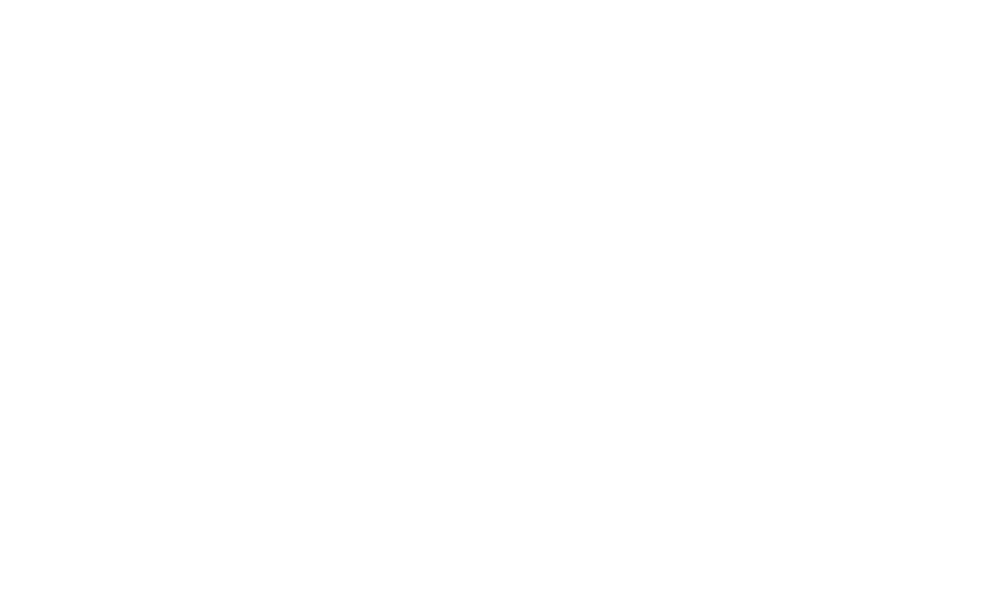

<IPython.core.display.Javascript object>


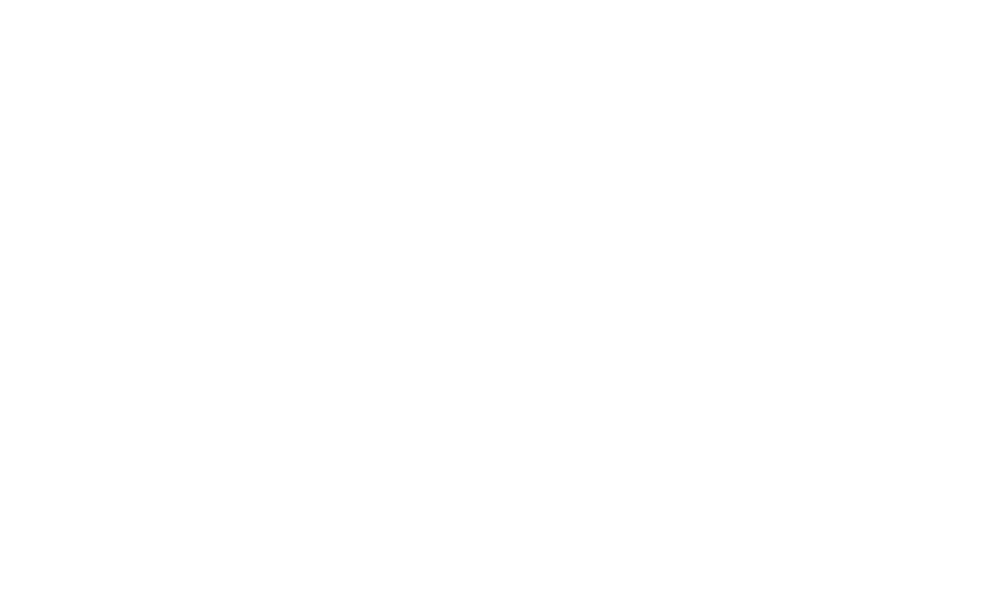

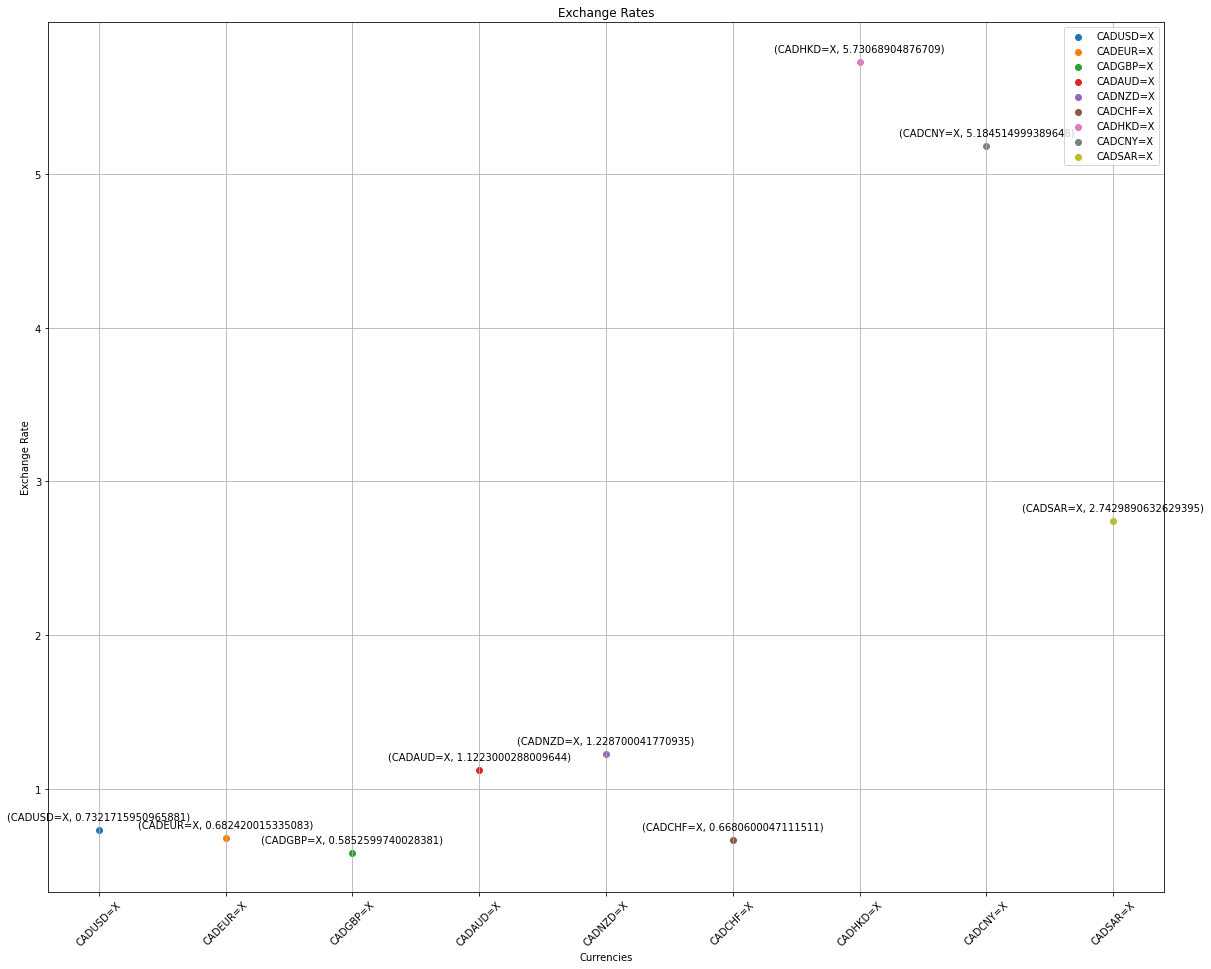

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 16))

for symbol in ticker_symbols:
    # Filter data 
    df_pair = result_df[result_df['Currency Pair'] == symbol]
    plt.scatter([symbol]*len(df_pair), df_pair['Close'], label=symbol)  # Use ticker symbol as x-axis label

    for i, (x, y) in enumerate(zip([symbol]*len(df_pair), df_pair['Close'])):
        plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

#Customize plot
plt.xlabel('Currencies')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rates')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

#Gridlines
plt.grid(True)

plt.show()

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
from ipywidgets import interact, widgets
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as widgets
from IPython.display import display
import matplotlib.collections
import numpy as np
import matplotlib.ticker as ticker 
%matplotlib notebook
from matplotlib.animation import FuncAnimation


def plot_exchange_rates(currency, time_period):
    #Start and end date
    if time_period == '5 Years':
        start_date = pd.Timestamp.now() - pd.DateOffset(years=5)
    elif time_period == '1 Year':
        start_date = pd.Timestamp.now() - pd.DateOffset(years=1)
    elif time_period == '6 Months':
        start_date = pd.Timestamp.now() - pd.DateOffset(months=6)
    elif time_period == '1 Month':
        start_date = pd.Timestamp.now() - pd.DateOffset(months=1)
    elif time_period == '5 Days':
        start_date = pd.Timestamp.now() - pd.DateOffset(days=5)
    else:
        start_date = pd.Timestamp.now() - pd.DateOffset(years=5)  
    
    #Historical data
    data = yf.download(currency, start=start_date, end=pd.Timestamp.now())
    
    def plot_exchange_rates(currency, time_period):
    #Fetch historical data
        data = yf.download(currency, start=start_date, end=pd.Timestamp.now())
    
    #Plot exchange rates
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(data.index, data['Close'])  
    ax.set_title(f'Exchange Rates for {currency} ({time_period})')
    ax.set_xlabel('Date')
    ax.set_ylabel('Exchange Rate')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    
    #scroll zooming
    mplcursors.cursor(hover=True)
    mplcursors.cursor().connect("add", lambda sel: sel.annotation.set_visible(False))
    
    def on_scroll(event):
        axtemp = event.inaxes
        xlim = axtemp.get_xlim()
        ylim = axtemp.get_ylim()
        x_center = np.mean(xlim)
        y_center = np.mean(ylim)
        if event.button == 'up':
            #zoom in
            scale_factor = 0.9
        elif event.button == 'down':
            #zoom out
            scale_factor = 1.1
        else:
        
            scale_factor = 1
        axtemp.set_xlim([x_center - (x_center - xlim[0]) * scale_factor,
                         x_center + (xlim[1] - x_center) * scale_factor])
        axtemp.set_ylim([y_center - (y_center - ylim[0]) * scale_factor,
                         y_center + (ylim[1] - y_center) * scale_factor])
        plt.draw()  # force re-draw
    
    fig.canvas.mpl_connect('scroll_event', on_scroll)
    
    def on_click(event):
        if event.button == 1:  
            ax._initial_xlim = ax.get_xlim()
            ax._initial_ylim = ax.get_ylim()
            ax._startx = event.xdata
            ax._starty = event.ydata
    
    def on_release(event):
        ax._startx = None
        ax._starty = None
    
def on_motion(event):
    if ax._startx is not None and ax._starty is not None:
        xlim = ax._initial_xlim - (event.xdata - ax._startx)
        ylim = ax._initial_ylim - (event.ydata - ax._starty)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.figure.canvas.draw_idle()  
    
    fig.canvas.mpl_connect('button_press_event', on_click)
    fig.canvas.mpl_connect('button_release_event', on_release)
    fig.canvas.mpl_connect('motion_notify_event', on_motion)
    
    plt.show()
    
    def update(frame, data):
        data = yf.download(currency, start=start_date, end=pd.Timestamp.now())
    line.set_data(data.index, data['Close'])
    ax.relim()
    ax.autoscale_view()
    return line,
    
    #Updates every 60 seconds
    
    anim = FuncAnimation(fig, update, interval=60000)
    
    plt.show()
    return anim
#Interactive widgets
currency_dropdown = widgets.Dropdown(options=['CADUSD=X', 'CADEUR=X', 'CADGBP=X', 'CADAUD=X', 'CADNZD=X','CADCHF=X','CADHKD=X','CADCNY=X','CADSAR=X'],
                                     description='Currency:')
time_period_dropdown = widgets.Dropdown(options=['5 Years', '1 Year', '6 Months', '1 Month', '5 Days'],
                                        description='Time Period:')

# Combine widgets
interact(plot_exchange_rates, currency=currency_dropdown, time_period=time_period_dropdown)

interactive(children=(Dropdown(description='Currency:', options=('CADUSD=X', 'CADEUR=X', 'CADGBP=X', 'CADAUD=X…

<function __main__.plot_exchange_rates(currency, time_period)>